<a href="https://colab.research.google.com/github/okayteakay/Fault-Analysis/blob/main/Fault_Analysis_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.metrics import confusion_matrix

IMPORT DATASET 

In [2]:
df = pd.read_excel('fault_dataset_new.xlsx')


In [3]:
df.head()

,RMS,Mean,fault in switch
0,58.703351,-33.734571,1
1,78.513080,-44.759827,1
2,84.864746,-48.919557,1
3,103.667227,-59.331936,1
4,110.626172,-63.883449,1


In [4]:
df.describe()

,RMS,Mean,fault in switch
count,432.000000,4.320000e+02,432.000000
mean,115.410739,-1.174613e-02,3.500000
std,36.616542,3.321025e+01,2.293944
min,23.874025,-8.238858e+01,0.000000
25%,88.312074,-1.103781e+01,1.750000
50%,116.501125,-8.790549e-07,3.500000
75%,143.389474,1.103781e+01,5.250000
max,196.885243,8.135974e+01,7.000000


DATA PRE-PROCESSING

In [5]:
for c in df.columns[:-1]:              #Standardization of Data 
  mu = df[c].mean()
  sigma = df[c].std()
  df[c] = (df[c] - mu)/(sigma)
print(df.head())

        RMS      Mean  fault in switch
0 -1.548682 -1.015434                1
1 -1.007677 -1.347418                1
2 -0.834213 -1.472672                1
3 -0.320716 -1.786201                1
4 -0.130667 -1.923253                1


In [6]:
for c in df.columns[:-1]:           #Normalization of Data
  min = df[c].min()
  max = df[c].max()
  df[c] = (df[c] - min)/(max - min)
print(df.head())

        RMS      Mean  fault in switch
0  0.201313  0.297127                1
1  0.315812  0.229796                1
2  0.352525  0.204393                1
3  0.461202  0.140805                1
4  0.501425  0.113010                1


In [7]:
y = df['fault in switch']

In [8]:
X = df.drop('fault in switch', axis =1)

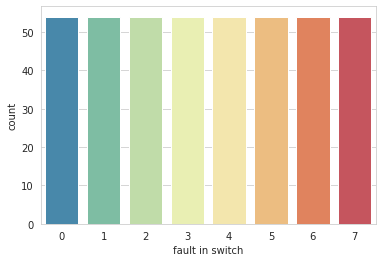

In [9]:
import seaborn as sns               #Analysing the dataset
sns.set_style('whitegrid')
sns.countplot(x='fault in switch',data=df,palette='Spectral_r')
plt.show()

## Feature Selection

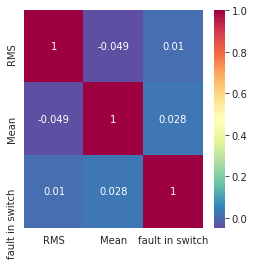

In [10]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Spectral_r")
plt.show()

### Neural Network

In [92]:
nn_model = Sequential()

nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))

nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))

nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dropout(0.5))

nn_model.add(Dense(8, activation='softmax'))

print(nn_model)

In [94]:
nn_model.compile(loss = 'categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),metrics = ['accuracy'])

In [95]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=)
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_nn, y_train_nn, test_size=0.25, random_state=91)

In [96]:
X_train_nn = np.asarray(X_train_nn).astype(np.float32)
X_test_nn = np.asarray(X_test_nn).astype(np.float32)
y_train_nn = np.asarray(y_train_nn).astype(np.float32)
y_test_nn = np.asarray(y_test_nn).astype(np.float32)
X_val_nn = np.asarray(X_val_nn).astype(np.float32)
y_val_nn = np.asarray(y_val_nn).astype(np.float32)


In [97]:
y_train_one_hot = to_categorical(y_train_nn, 8)
y_val_one_hot = to_categorical(y_val_nn, 8)
y_test_one_hot = to_categorical(y_test_nn, 8)


In [100]:
hist = nn_model.fit(X_train_nn,y_train_one_hot, epochs=3000, batch_size = 32, validation_data=(X_val_nn, y_val_one_hot), verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
9/9 [==============================] - 0s 12ms/step - loss: 0.6410 - accuracy: 0.7016 - val_loss: 0.4278 - val_accuracy: 0.8161
Epoch 502/3000
9/9 [==============================] - 0s 14ms/step - loss: 0.6114 - accuracy: 0.7054 - val_loss: 0.4266 - val_accuracy: 0.8161
Epoch 503/3000
9/9 [==============================] - 0s 13ms/step - loss: 0.6191 - accuracy: 0.7248 - val_loss: 0.4270 - val_accuracy: 0.8161
Epoch 504/3000
9/9 [==============================] - 0s 13ms/step - loss: 0.6216 - accuracy: 0.7209 - val_loss: 0.4262 - val_accuracy: 0.8161
Epoch 505/3000
9/9 [==============================] - 0s 11ms/step - loss: 0.6572 - accuracy: 0.7054 - val_loss: 0.4267 - val_accuracy: 0.8161
Epoch 506/3000
9/9 [==============================] - 0s 12ms/step - loss: 0.5827 - accuracy: 0.7209 - val_loss: 0.4259 - val_accuracy: 0.8161
Epoch 507/3000
9/9 [==============================] - 0s 13ms/step - loss: 0.6227 - accurac

In [101]:
predictions = nn_model.predict(X_test_nn)

In [102]:
predictions

array([[1.49307725e-05, 7.66853781e-26, 2.23193574e-03, 3.83878976e-01,
        6.99308348e-32, 6.13857627e-01, 0.00000000e+00, 1.65760757e-05],
       [5.41200806e-10, 0.00000000e+00, 4.83981450e-04, 3.82157743e-01,
        0.00000000e+00, 6.17358327e-01, 0.00000000e+00, 1.64012282e-09],
       [0.00000000e+00, 0.00000000e+00, 9.52578092e-04, 9.90552425e-01,
        0.00000000e+00, 8.49506352e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.11288941e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.63240381e-19, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.26931548e-21, 6.34498138e-04, 3.28569405e-33, 4.52219220e-35,
        9.95076239e-01, 0.00000000e+00, 4.28930437e-03, 4.68650922e-18],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 8.93161532e-32,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.

In [103]:
a = np.argmax(predictions, axis = 1)

In [104]:
y_test_nn

array([3., 5., 3., 1., 1., 4., 2., 1., 4., 2., 1., 4., 6., 3., 6., 6., 0.,
       7., 0., 0., 5., 1., 0., 1., 4., 2., 6., 2., 0., 2., 5., 2., 6., 1.,
       7., 7., 1., 3., 4., 6., 6., 7., 3., 1., 5., 2., 7., 5., 4., 5., 2.,
       3., 2., 6., 7., 1., 3., 6., 7., 4., 3., 7., 5., 3., 4., 0., 1., 3.,
       2., 7., 1., 5., 6., 1., 6., 6., 1., 3., 4., 4., 1., 4., 1., 6., 1.,
       7., 6.], dtype=float32)

In [105]:
nn_accuracy = []
count = 0
for i,c in enumerate(y_test_nn):
    if c == a[i]:
      nn_accuracy.append(1)
      count += 1
    else:
      nn_accuracy.append(0)
print('accuracy', count/len(nn_accuracy))

accuracy 0.7701149425287356


### DECISION TREE

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23) 

In [107]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 7).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

In [108]:
dtree_model.score(X_test, y_test)

0.9907407407407407

In [109]:
b = dtree_predictions

In [110]:
dtree_accuracy = []
count = 0
for i,c in enumerate(y_test):
    if c == b[i]:
      dtree_accuracy.append(1)
      count += 1
    else:
      dtree_accuracy.append(0)
print('decision_tree_accuracy', count/len(dtree_accuracy))

decision_tree_accuracy 0.9907407407407407


In [111]:
def relation_graph(max_depth):
  dtree_model = DecisionTreeClassifier(max_depth = max_depth).fit(X_train, y_train) 
  dtree_predictions = dtree_model.predict(X_test)
  dtree_accuracy = []
  count = 0
  for i,c in enumerate(y_test):
      if c == dtree_predictions[i]:
        dtree_accuracy.append(1)
        count += 1
      else:
        dtree_accuracy.append(0)
  print('decision_tree_accuracy', count/len(dtree_accuracy))
  return (count/len(dtree_accuracy))



decision_tree_accuracy 0.4537037037037037
decision_tree_accuracy 0.7222222222222222
decision_tree_accuracy 0.8888888888888888
decision_tree_accuracy 0.9629629629629629
decision_tree_accuracy 0.9814814814814815
decision_tree_accuracy 0.9907407407407407
decision_tree_accuracy 0.9907407407407407
decision_tree_accuracy 0.9907407407407407
decision_tree_accuracy 0.9907407407407407


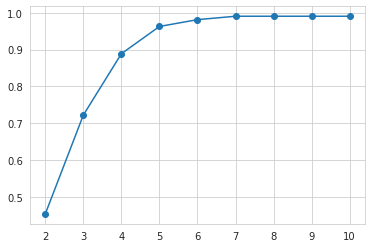

In [112]:
accuracy= []
for i in range(2,11):
  a = relation_graph(i)
  accuracy.append(a)
plt.plot(np.arange(2,11,1), accuracy, '-o')

### SVM

In [113]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'rbf', C = 11).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

In [114]:
accuracy

0.8611111111111112

In [115]:
cm

array([[10,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  9,  0,  3,  0],
       [ 0,  0,  0,  1,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0],
       [11,  0,  0,  0,  0,  0,  0,  4]])

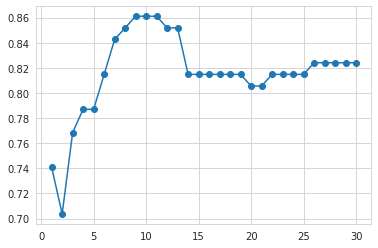

In [116]:
accuracy = []
for i in range(1,31):
  svm_model_linear = SVC(kernel = 'rbf', C = i).fit(X_train, y_train) 
  svm_predictions = svm_model_linear.predict(X_test) 
  svm_accuracy = svm_model_linear.score(X_test, y_test) 
  accuracy.append(svm_accuracy)
plt.plot(np.arange(1,31), accuracy, '-o')
  

#KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

0.8611111111111112


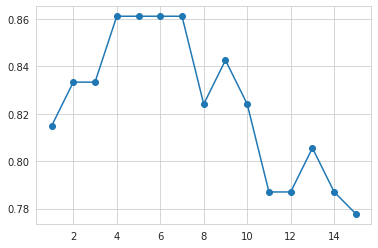

In [118]:
accuracy = []
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train) 
  knn_accuracy = knn.score(X_test, y_test)
  accuracy.append(knn_accuracy)
plt.plot(np.arange(1,16), accuracy, '-o')
  

In [119]:
cm

array([[10,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0,  0,  0],
       [ 2,  0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0],
       [ 1,  0,  0,  1,  0, 14,  0,  0],
       [ 0,  0,  0,  0,  4,  0, 10,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  8]])

## Naive Bayes

In [122]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print ('accuracy', accuracy) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions)
print(cm)

accuracy 0.8055555555555556
[[10  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0]
 [ 0  0  0  6  0 10  0  0]
 [ 0  0  0  0  9  0  3  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0 14  0]
 [ 8  0  0  0  0  0  0  7]]
